# Extraction

In [48]:
#Libraries
import imaplib
import email
from email.header import decode_header
import getpass 
import csv
import mailbox, pandas as pd, numpy as np 
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from dateutil.parser import parse
import matplotlib as mpl

#theme libs, can be removed
mpl.rcParams['figure.dpi']= 200
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
%matplotlib inline


## Extracting mails from Email
To log on to email account using IMAP.
An extractor funtion that extraxcts each mail from gmail account and saves them as a .csv filelocally.

In [38]:
#getting login
print("\nPlease enter your Gmail login details below.")
user = input("Email: ")
password = getpass.getpass("Password: ")


Please enter your Gmail login details below.
Email: dakshmall2000@gmail.com
Password: ········


In [123]:
#login using IMAP and extracting emails
imap = imaplib.IMAP4_SSL("imap.gmail.com")
imap.login(user,password)
imap.select('INBOX')
status, response = imap.uid('search', None, 'ALL')
email_nums = response[0].split()
data_list = []
all_dates = []
all_times = []
for e_id in email_nums:
    data_dict = {}
    e_id = e_id.decode('utf-8')
    _, response = imap.uid('fetch', e_id, '(RFC822)')
    html = response[0][1].decode('utf-8')
    email_message = email.message_from_string(html)
    data_dict['From'] = email.utils.parseaddr(email_message['From'])
    data_dict['To'] = email_message['To']
    date, time = str(parse(email_message['Date'],fuzzy=True)).split(' ')
    all_dates.append(date)
    all_times.append(time)
    data_dict['Date'] = date
    data_dict['Time'] = time
    data_dict['Subject'] = email_message['Subject']
    data_list.append(data_dict)
x = int(len(data_list))
#Dataframe containg email info
df = pd.DataFrame(data_list) 
df.head()

,From,To,Date,Time,Subject
0,"(Gmail Team, mail-noreply@google.com)",daksh mall <dakshmall2000@gmail.com>,2014-12-13,23:53:36-08:00,Three tips to get the most out of Gmail
1,"(Gmail Team, mail-noreply@google.com)",daksh mall <dakshmall2000@gmail.com>,2014-12-13,23:53:37-08:00,"The best of Gmail, wherever you are"
2,"(Gmail Team, mail-noreply@google.com)",daksh mall <dakshmall2000@gmail.com>,2014-12-13,23:53:37-08:00,Stay more organized with Gmail's inbox
3,"(, ticketadmin@irctc.co.in)",dakshmall2000@gmail.com,2014-12-14,13:24:30+05:30,SUCCESSFUL REGISTRATION of reetabizzu for IRCT...
4,"(Amazon.in, account-update@amazon.in)",daksh <dakshmall2000@gmail.com>,2014-12-14,07:59:06+00:00,Welcome to Amazon!-Take a tour of Your Account...


In [122]:
#creates a .csv file with email info
#don't run if do not want to save email info on local device, for security reasons
df.to_csv('mail_out.csv')

# Visualizations
Various visualization techniques used to generate different graphs that are easy to understand and interpret

## Email traffic by date
A bar plot to show gmail traffic for each date

There are 1,077 dates with mails.


C:\Users\Admin\Anaconda3\envs\cudafinal\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


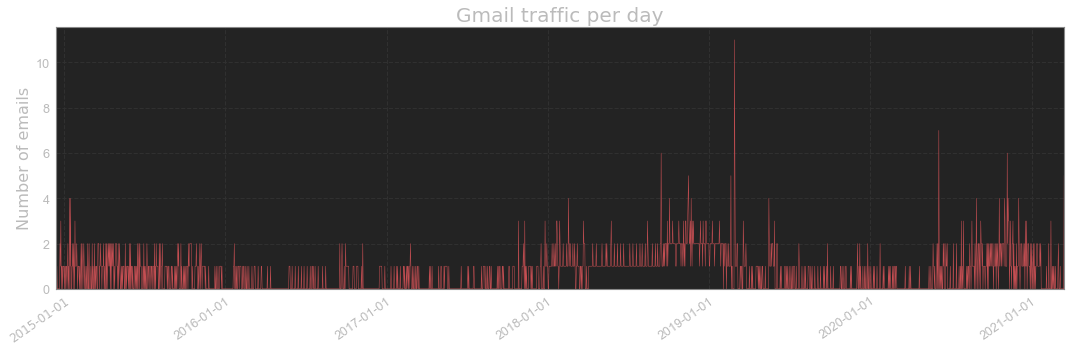

In [110]:
# get the count per date
date_counts = pd.Series(all_dates).value_counts().sort_index()
print('There are {:,} dates with mails.'.format(len(date_counts)))

# not every date necessarily has a message, so fill in missing dates in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
index = date_range.map(lambda x: str(x.date()))
date_counts = date_counts.reindex(index, fill_value=0)

# create a series of labels for the plot: each new year's day
xlabels = pd.Series([label if '01-01' in label else None for label in date_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

# plot the counts per day
fig = plt.figure(figsize=[15, 5])
ax = date_counts.plot(kind='line', linewidth=0.5, color='r')
ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per day', fontproperties=title_font)

fig.tight_layout()
fig.savefig('output_img/gmail-traffic-date.png', dpi=96)
plt.show()

## Email traffic month by month
A line plot to show gmail traffic for each month

C:\Users\Admin\Anaconda3\envs\cudafinal\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


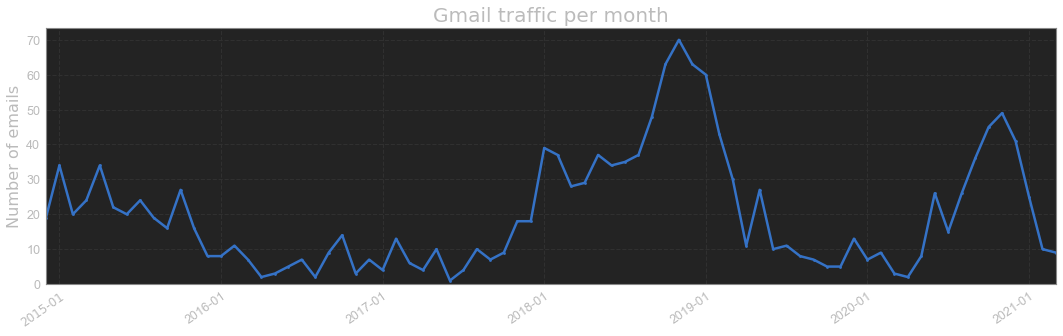

In [112]:
# get the count per month
all_months = [x[:-3] for x in all_dates]
month_counts = pd.Series(all_months).value_counts().sort_index()

# not every month necessarily has a message, so fill in missing months in the range with zeros
date_range = pd.date_range(start=min(all_dates), end=max(all_dates), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

# create a series of labels for the plot: each january
xlabels = pd.Series([label if '-01' in label else None for label in month_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

# plot the counts per month
fig = plt.figure(figsize=[15, 5])
ax = month_counts.plot(kind='line', linewidth=2.5, color='b', marker='.', markeredgecolor='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic per month', fontproperties=title_font)
fig.savefig('output_img/gmail-traffic-month.png', dpi=96)
fig.tight_layout()
plt.show()

## Email traffic by the day of the week
A bar plot to show mean no. of emails recived fro each week day

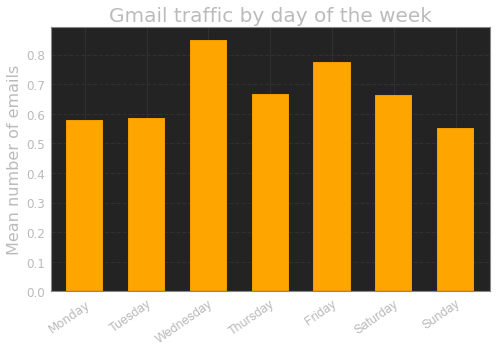

In [113]:
# get the count per day of the week
day_counts = pd.DataFrame()
day_counts['count'] = date_counts
day_counts['day_of_week'] = date_counts.index.map(lambda x: parse_datetime(x).weekday())
mean_day_counts = day_counts.groupby('day_of_week')['count'].mean()
xlabels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=[7, 5])
ax = mean_day_counts.plot(kind='bar', width=0.6, color='orange', edgecolor='#333333', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(xlabels, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Gmail traffic by day of the week', fontproperties=title_font)
ax.set_xlabel('')
ax.set_ylabel('Mean number of emails', fontproperties=label_font)
fig.savefig('output_img/gmail-traffic-week.png')
fig.tight_layout()
plt.show()

## Email traffic by the hour of the day
A bar plot to show mean no. of emails recived in each hour

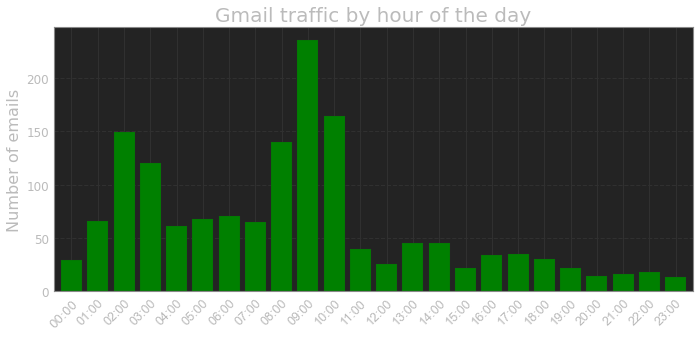

In [114]:
# get the count per hour of the day
times = pd.Series(all_times).map(lambda x: '{:02}:00'.format(parse_datetime(x).hour))
time_counts = times.value_counts().sort_index()

fig = plt.figure(figsize=[10, 5])
ax = time_counts.plot(kind='bar', width=0.8, color='Green', edgecolor='#333333', zorder=2)

ax.yaxis.grid(True, linestyle='--')
ax.set_xticklabels(time_counts.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Gmail traffic by hour of the day', fontproperties=title_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
fig.savefig('output_img/gmail-traffic-hour.png', dpi=96)
fig.tight_layout()
plt.show()

## Email traffic by the minute of the day
A bar plot to show mean no. of emails recived in each hour

C:\Users\Admin\Anaconda3\envs\cudafinal\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


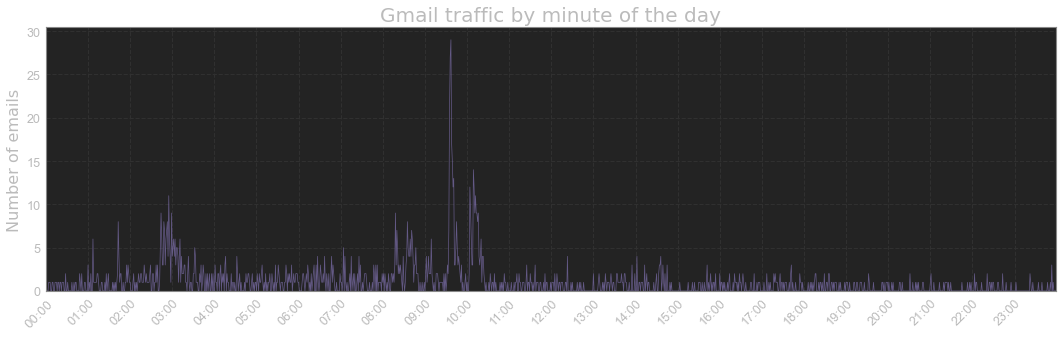

In [116]:
# get the count per minute of the day, as hh:mm
minutes = pd.Series(all_times).map(lambda x: '{:02}:{:02}'.format(parse_datetime(x).hour, parse_datetime(x).minute))
minute_counts = minutes.value_counts().sort_index()

# not every minute necessarily has a message, so fill in missing times with zeros
time_range = pd.date_range(start='0:00', end='23:59', freq='1min')
index = time_range.map(lambda x: '{:02}:{:02}'.format(x.hour, x.minute))
minute_counts = minute_counts.reindex(index, fill_value=0)

# create a series of labels for the plot: each new hour
xlabels = pd.Series([label if ':00' in label else None for label in minute_counts.index])
xlabels = xlabels[pd.notnull(xlabels)]

# plot the counts per minute
fig = plt.figure(figsize=[15, 5])
ax = minute_counts.plot(kind='line', linewidth=0.7, alpha=0.7, color='m')

ax.set_ylim(bottom=0)
ax.grid(True, linestyle='--')
ax.set_xticks(xlabels.index)
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.set_ylabel('Number of emails', fontproperties=label_font)
ax.set_title('Gmail traffic by minute of the day', fontproperties=title_font)
fig.savefig('output_img/gmail-traffic-min.png', dpi=96)
fig.tight_layout()
plt.show()

## Word Cloud
A word cloud that shows most used keywords from body of all mails

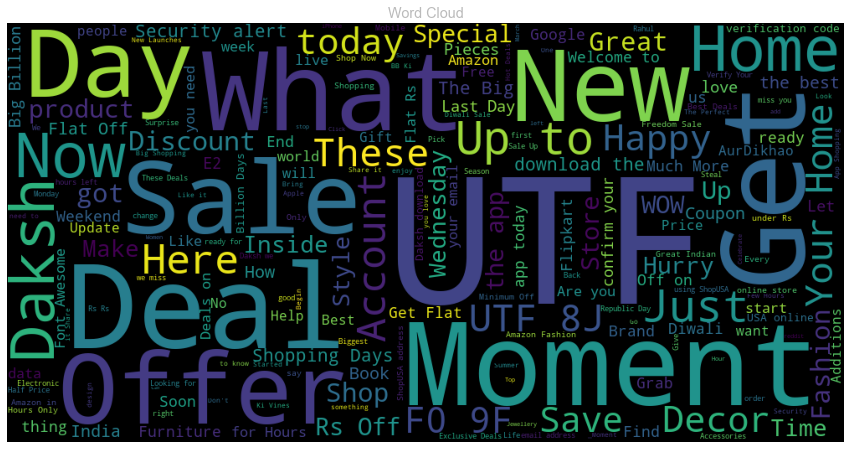

In [117]:
import seaborn as sns
from wordcloud import WordCloud 
list_sub = mail_out['Subject'].tolist()
#convert list to string and generate
unique_string=(" ").join(list_sub)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud") 
plt.savefig('Output_img/wordcloud.png', dpi=96)
plt.show()
plt.close()

## Read-Unread Pie
Percentage of mails read and unread

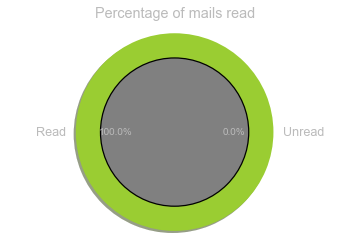

In [119]:
imap = imaplib.IMAP4_SSL("imap.gmail.com")
imap.login(user,password)
imap.select('INBOX')
status, response = imap.uid('search', None, 'UNSEEN')
if status == 'OK':
    unread_msg_nums = response[0].split()
else:
    unread_msg_nums = []
data_list = []
for e_id in unread_msg_nums:
    data_dict = {}
    e_id = e_id.decode('utf-8')
    _, response = imap.uid('fetch', e_id, '(RFC822)')
    html = response[0][1].decode('utf-8')
    email_message = email.message_from_string(html)
    data_dict['mail_to'] = email_message['To']
    data_dict['mail_subject'] = email_message['Subject']
    data_dict['mail_from'] = email.utils.parseaddr(email_message['From'])
    data_dict['body'] = email_message.get_payload()
    data_list.append(data_dict)
x = int(len(data_list))
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = 'Read', 'Unread'
sizes = [100-x, x]
colors = ['yellowgreen', 'gold']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)      
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='gray',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Percentage of mails read") 
fig.savefig('output_img/read-unread.png',dpi=96)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show() 

## Top 20 senders
Top 20 senders and thier percentage

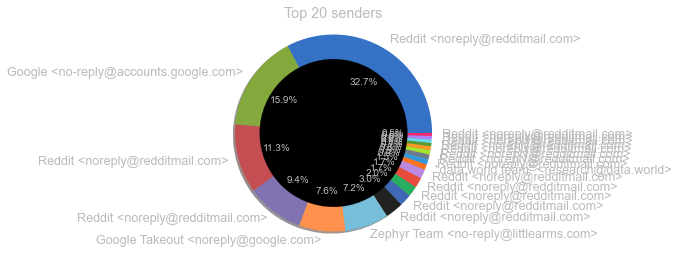

In [120]:
s = mail_out['From'].value_counts()[:20]
s = s.to_frame()
y = s.values.flatten()

plt.pie(y, labels = mail_out['From'][0:20].ravel(), autopct='%1.1f%%', shadow=True)      
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75, color='black', fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top 20 senders") 
fig.savefig('output_img/top20.png',dpi=96)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  

## Saving output in html
Generate a html file with all the graphs

In [121]:
html = """
<img src="output_img\gmail-traffic-day.png" alt="gmail-traffic-day">
<img src="output_img\gmail-traffic-month.png" alt="gmail-traffic-month">
<img src="output_img\gmail-traffic-week.png" alt="gmail-traffic-week">
<img src="output_img\gmail-traffic-hour.png" alt="gmail-traffic-hour">
<img src="output_img\gmail-traffic-min.png" alt="gmail-traffic-min">
<img src="output_img\wordcloud.png" alt="Word Cloud">
<img src="output_img/read-unread.png" alt="Italian Trulli">
<img src="output_img/top20.png" alt="top20.png">
"""

# Write HTML String to file.html
with open("file.html", "w") as file:
    file.write(html)

webbrowser.open_new_tab('file.html')

True

error: b'[AUTHENTICATIONFAILED] Invalid credentials (Failure)'